In [1]:
import time
import datetime
import pandas as pd
from pandas_datareader import data as web
import yfinance as yf
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_style('white')

In [2]:
pd.set_option("display.max_columns", 100)
pd.set_option("display.max_rows", 100)

In [9]:
PATH = r'C:\Users\44738\Desktop\Desktop Files\Dissertation\Scripts\nasdaq100.csv'
all_tickers = pd.read_csv(PATH)
start_date = '2016-07-01'
end_date = '2021-07-01'

In [10]:
def value_at_risk(returns, confidence_level=.05):
    
    print('VaR:', returns.quantile(confidence_level, interpolation='higher'))
    # Calculating VaR
    return float(returns.quantile(confidence_level, interpolation='higher'))

In [11]:
def expected_shortfall(returns, confidence_level=.05):
    
    # Calculating VaR
    var = value_at_risk(returns, confidence_level)
    # ES is the average of the worst losses (under var)
    return float(returns[returns.lt(var)].mean())

In [12]:
tickers = ["^NDX"]

In [13]:
interval = '1d'
period1 = int(time.mktime(datetime.datetime(2016, 7, 1, 23, 59).timetuple()))
period2 = int(time.mktime(datetime.datetime(2021, 7, 1, 23, 59).timetuple()))
nasdaq = pd.DataFrame()

xlwriter = pd.ExcelWriter('historical prices.xlsx', engine='openpyxl')
for ticker in tickers:
    query_string = f'https://query1.finance.yahoo.com/v7/finance/download/{ticker}?period1={period1}&period2={period2}&interval={interval}&events=history&includeAdjustedClose=true'
    df = pd.read_csv(query_string)
    df.drop(columns=['Open', 'Close', 'Low', 'High', 'Volume'], inplace=True)
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)
    df.rename(columns={'Adj Close': ticker}, inplace=True)
    nasdaq = pd.concat([nasdaq, df], axis=1)

In [14]:
# Dont rerun
interval = '1d'
period1 = int(time.mktime(datetime.datetime(2016, 7, 1, 23, 59).timetuple()))
period2 = int(time.mktime(datetime.datetime(2021, 7, 1, 23, 59).timetuple()))
balanced = pd.DataFrame()

xlwriter = pd.ExcelWriter('historical prices.xlsx', engine='openpyxl')
for ticker in all_tickers['all_stocks']:
    query_string = f'https://query1.finance.yahoo.com/v7/finance/download/{ticker}?period1={period1}&period2={period2}&interval={interval}&events=history&includeAdjustedClose=true'
    df = pd.read_csv(query_string)
    df.drop(columns=['Open', 'Close', 'Low', 'High', 'Volume'], inplace=True)
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)
    df.rename(columns={'Adj Close': ticker}, inplace=True)
    balanced = pd.concat([balanced, df], axis=1)
balanced = balanced.iloc[1:]

In [15]:
balanced

,CTAS,IDXX,ADI,LRCX,DOCU,FOXA,MXIM,VRTX,FOX,MELI,ASML,NXPI,XLNX,PAYX,VRSK,MCHP,KLAC,SNPS,ILMN,SWKS,ANSS,INCY,PCAR,ISRG,NVDA,MNST,VRSN,AVGO,SPLK,KHC,FAST,CHKP,NTES,LULU,COST,REGN,DXCM,ALGN,ADP,ORLY,HON,ATVI,CPRT,CTSH,DLTR,ROST,KDP,TXN,EA,TSLA,AMAT,AMGN,EBAY,ZM,TEAM,ADSK,PYPL,MU,XEL,ADBE,OKTA,FISV,MDLZ,AMD,BIIB,QCOM,INTU,EXC,WDAY,CSCO,GOOG,GOOGL,FB,WBA,JD,PEP,INTC,SBUX,CHTR,SIRI,MSFT,MTCH,TMUS,NFLX,GILD,AAPL,MAR,CMCSA,AMZN
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-07-05,93.520042,93.379997,49.710304,75.339310,NaN,NaN,30.910458,86.510002,NaN,139.251511,91.007591,73.695290,41.938126,51.035912,80.271530,45.747108,64.142731,53.560001,138.669998,54.321766,89.089996,79.709999,42.050591,221.556671,11.646004,53.636665,84.190002,126.946327,53.750000,71.024338,19.154684,79.739998,34.722328,73.279999,138.020752,359.609985,79.050003,80.870003,83.682518,275.750000,98.652626,38.938759,24.700001,53.504433,94.980003,53.892075,14.081764,53.408726,75.515427,42.796001,22.255962,132.990005,22.879030,NaN,26.170000,52.799999,36.119999,11.910000,39.056919,94.730003,NaN,54.715000,40.450581,4.960000,242.029999,43.836079,107.744011,30.150625,72.650002,24.210953,694.950012,704.890015,114.199997,71.555412,20.860001,91.168175,28.532145,51.340881,231.770004,3.779524,47.050705,14.266892,43.209999,97.910004,70.658615,22.151365,63.751804,29.490868,728.099976
2016-07-06,93.332062,93.570000,49.800106,75.403725,NaN,NaN,31.146755,89.660004,NaN,139.112061,90.578041,73.319298,41.855286,51.672905,80.310875,45.425850,64.276146,53.740002,140.789993,54.635773,89.260002,82.480003,42.308830,223.479996,11.719793,53.753334,82.980003,126.836868,54.000000,71.824722,19.137419,81.629997,34.588520,74.410004,138.696381,371.570007,78.690002,81.250000,83.781174,277.380005,100.013901,39.287895,24.660000,53.855442,94.860001,54.303246,14.139632,53.243057,76.361221,42.888000,22.405338,134.524445,22.946436,NaN,26.969999,52.959999,35.930000,11.730000,39.108688,95.180000,NaN,54.355000,40.720856,5.040000,247.479996,44.198986,108.260078,30.500343,72.599998,24.544249,697.770020,708.969971,116.699997,69.867622,20.379999,90.739861,28.785343,51.322788,232.779999,3.827487,47.243805,14.381104,43.150002,94.599998,72.208405,22.277292,64.473984,29.531693,737.609985
2016-07-07,92.824516,93.860001,50.240101,75.477318,NaN,NaN,31.698109,90.050003,NaN,142.338898,90.310768,73.724228,42.066963,51.460571,80.497734,46.261116,64.258377,53.820000,140.059998,56.233475,89.680000,83.529999,42.275494,225.100006,12.024776,53.706669,83.400002,127.140022,54.869999,71.480560,19.301432,81.860001,35.019672,75.199997,145.532959,371.450012,78.209999,81.889999,83.852913,275.279999,99.406044,39.171516,24.465000,53.921837,94.629997,54.083309,14.034025,53.862152,76.241821,43.188000,22.676069,134.989975,23.042728,NaN,26.580000,53.529999,36.320000,12.200000,38.237305,95.139999,NaN,54.215000,40.693825,5.020000,247.270004,44.671608,109.187096,29.725977,73.790001,24.561342,695.359985,707.260010,115.849998,68.968048,20.570000,92.084839,28.986137,51.467491,234.869995,3.865857,47.243805,14.095576,42.959999,95.099998,71.989418,22.372902,64.958611,30.057915,736.570007
2016-07-08,93.642227,94.959999,51.847420,78.090126,NaN,NaN,32.275715,88.959999,NaN,145.625473,92.802177,76.307991,43.226543,52.089073,82.022133,47.610386,65.601532,54.250000,141.250000,58.098976,91.419998,85.699997,43.416729,226.279999,12.506849,53.833332,85.599998,130.634460,56.630001,71.912743,19.521553,83.150002,34.404552,76.720001,147.079880,378.350006,78.870003,82.930000,84.722847,280.609985,101.743279,40.044369,24.924999,54.955879,95.080002,55.641941,14.051385,55.170128,77.873734,43.355999,23.273539,138.877869,23.697519,NaN,26.980000,55.139999,37.360001,12.620000,38.470249,96.790001,NaN,54.845001,41.531662,5.100000,251.300003,45.735020,110.653168,30.067368,75.709999,25.005735,705.630005,717.780029,117.239998,70.081802,20.719999,92.753044,29.684607,51.105740,237.169998,3.952191,48.089737,14.133647,43.580002,97.0

In [16]:
balanced.drop(columns=['DOCU','FOXA','FOX','ZM','OKTA'], inplace=True)
balanced

,CTAS,IDXX,ADI,LRCX,MXIM,VRTX,MELI,ASML,NXPI,XLNX,PAYX,VRSK,MCHP,KLAC,SNPS,ILMN,SWKS,ANSS,INCY,PCAR,ISRG,NVDA,MNST,VRSN,AVGO,SPLK,KHC,FAST,CHKP,NTES,LULU,COST,REGN,DXCM,ALGN,ADP,ORLY,HON,ATVI,CPRT,CTSH,DLTR,ROST,KDP,TXN,EA,TSLA,AMAT,AMGN,EBAY,TEAM,ADSK,PYPL,MU,XEL,ADBE,FISV,MDLZ,AMD,BIIB,QCOM,INTU,EXC,WDAY,CSCO,GOOG,GOOGL,FB,WBA,JD,PEP,INTC,SBUX,CHTR,SIRI,MSFT,MTCH,TMUS,NFLX,GILD,AAPL,MAR,CMCSA,AMZN
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-07-05,93.520042,93.379997,49.710304,75.339310,30.910458,86.510002,139.251511,91.007591,73.695290,41.938126,51.035912,80.271530,45.747108,64.142731,53.560001,138.669998,54.321766,89.089996,79.709999,42.050591,221.556671,11.646004,53.636665,84.190002,126.946327,53.750000,71.024338,19.154684,79.739998,34.722328,73.279999,138.020752,359.609985,79.050003,80.870003,83.682518,275.750000,98.652626,38.938759,24.700001,53.504433,94.980003,53.892075,14.081764,53.408726,75.515427,42.796001,22.255962,132.990005,22.879030,26.170000,52.799999,36.119999,11.910000,39.056919,94.730003,54.715000,40.450581,4.960000,242.029999,43.836079,107.744011,30.150625,72.650002,24.210953,694.950012,704.890015,114.199997,71.555412,20.860001,91.168175,28.532145,51.340881,231.770004,3.779524,47.050705,14.266892,43.209999,97.910004,70.658615,22.151365,63.751804,29.490868,728.099976
2016-07-06,93.332062,93.570000,49.800106,75.403725,31.146755,89.660004,139.112061,90.578041,73.319298,41.855286,51.672905,80.310875,45.425850,64.276146,53.740002,140.789993,54.635773,89.260002,82.480003,42.308830,223.479996,11.719793,53.753334,82.980003,126.836868,54.000000,71.824722,19.137419,81.629997,34.588520,74.410004,138.696381,371.570007,78.690002,81.250000,83.781174,277.380005,100.013901,39.287895,24.660000,53.855442,94.860001,54.303246,14.139632,53.243057,76.361221,42.888000,22.405338,134.524445,22.946436,26.969999,52.959999,35.930000,11.730000,39.108688,95.180000,54.355000,40.720856,5.040000,247.479996,44.198986,108.260078,30.500343,72.599998,24.544249,697.770020,708.969971,116.699997,69.867622,20.379999,90.739861,28.785343,51.322788,232.779999,3.827487,47.243805,14.381104,43.150002,94.599998,72.208405,22.277292,64.473984,29.531693,737.609985
2016-07-07,92.824516,93.860001,50.240101,75.477318,31.698109,90.050003,142.338898,90.310768,73.724228,42.066963,51.460571,80.497734,46.261116,64.258377,53.820000,140.059998,56.233475,89.680000,83.529999,42.275494,225.100006,12.024776,53.706669,83.400002,127.140022,54.869999,71.480560,19.301432,81.860001,35.019672,75.199997,145.532959,371.450012,78.209999,81.889999,83.852913,275.279999,99.406044,39.171516,24.465000,53.921837,94.629997,54.083309,14.034025,53.862152,76.241821,43.188000,22.676069,134.989975,23.042728,26.580000,53.529999,36.320000,12.200000,38.237305,95.139999,54.215000,40.693825,5.020000,247.270004,44.671608,109.187096,29.725977,73.790001,24.561342,695.359985,707.260010,115.849998,68.968048,20.570000,92.084839,28.986137,51.467491,234.869995,3.865857,47.243805,14.095576,42.959999,95.099998,71.989418,22.372902,64.958611,30.057915,736.570007
2016-07-08,93.642227,94.959999,51.847420,78.090126,32.275715,88.959999,145.625473,92.802177,76.307991,43.226543,52.089073,82.022133,47.610386,65.601532,54.250000,141.250000,58.098976,91.419998,85.699997,43.416729,226.279999,12.506849,53.833332,85.599998,130.634460,56.630001,71.912743,19.521553,83.150002,34.404552,76.720001,147.079880,378.350006,78.870003,82.930000,84.722847,280.609985,101.743279,40.044369,24.924999,54.955879,95.080002,55.641941,14.051385,55.170128,77.873734,43.355999,23.273539,138.877869,23.697519,26.980000,55.139999,37.360001,12.620000,38.470249,96.790001,54.845001,41.531662,5.100000,251.300003,45.735020,110.653168,30.067368,75.709999,25.005735,705.630005,717.780029,117.239998,70.081802,20.719999,92.753044,29.684607,51.105740,237.169998,3.952191,48.089737,14.133647,43.580002,97.059998,72.899078,22.545471,66.374481,30.443495,745.809998
2016-07-11,92.175995,94.599998,52.305370,79.424133

In [17]:
interval = '1d'
period1 = int(time.mktime(datetime.datetime(2016, 7, 1, 23, 59).timetuple()))
period2 = int(time.mktime(datetime.datetime(2021, 7, 1, 23, 59).timetuple()))
screened = pd.DataFrame()

xlwriter = pd.ExcelWriter('historical prices.xlsx', engine='openpyxl')
for ticker in all_tickers['stocks']:
    query_string = f'https://query1.finance.yahoo.com/v7/finance/download/{ticker}?period1={period1}&period2={period2}&interval={interval}&events=history&includeAdjustedClose=true'
    df = pd.read_csv(query_string)
    df.drop(columns=['Open', 'Close', 'Low', 'High', 'Volume'], inplace=True)
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)
    df.rename(columns={'Adj Close': ticker}, inplace=True)
    screened = pd.concat([screened, df], axis=1)

In [19]:
screened = screened.loc[:,'CTAS':'ROST']

In [20]:
screened

,CTAS,IDXX,ADI,LRCX,DOCU,FOXA,MXIM,VRTX,FOX,MELI,ASML,NXPI,XLNX,PAYX,VRSK,MCHP,KLAC,SNPS,ILMN,SWKS,ANSS,INCY,PCAR,ISRG,NVDA,MNST,VRSN,AVGO,SPLK,KHC,FAST,CHKP,NTES,LULU,COST,REGN,DXCM,ALGN,ADP,ORLY,HON,ATVI,CPRT,CTSH,DLTR,ROST
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-07-01,92.974899,93.070000,50.850697,76.342110,NaN,NaN,31.067986,87.739998,NaN,139.241531,93.966736,75.170364,42.508709,50.483837,79.592934,46.279469,64.489632,53.770000,140.729996,57.812695,90.650002,81.269997,43.183498,222.103333,11.476297,53.243332,85.339996,129.859818,54.560001,70.624161,19.547449,79.620003,34.300468,73.959999,138.785278,358.500000,79.580002,82.540001,83.180305,274.230011,99.739922,38.415043,24.670000,54.263359,93.779999,53.882515
2016-07-05,93.520042,93.379997,49.710304,75.339310,NaN,NaN,30.910458,86.510002,NaN,139.251511,91.007591,73.695290,41.938126,51.035912,80.271530,45.747108,64.142731,53.560001,138.669998,54.321766,89.089996,79.709999,42.050591,221.556671,11.646004,53.636665,84.190002,126.946327,53.750000,71.024338,19.154684,79.739998,34.722328,73.279999,138.020752,359.609985,79.050003,80.870003,83.682518,275.750000,98.652626,38.938759,24.700001,53.504433,94.980003,53.892075
2016-07-06,93.332062,93.570000,49.800106,75.403725,NaN,NaN,31.146755,89.660004,NaN,139.112061,90.578041,73.319298,41.855286,51.672905,80.310875,45.425850,64.276146,53.740002,140.789993,54.635773,89.260002,82.480003,42.308830,223.479996,11.719793,53.753334,82.980003,126.836868,54.000000,71.824722,19.137419,81.629997,34.588520,74.410004,138.696381,371.570007,78.690002,81.250000,83.781174,277.380005,100.013901,39.287895,24.660000,53.855442,94.860001,54.303246
2016-07-07,92.824516,93.860001,50.240101,75.477318,NaN,NaN,31.698109,90.050003,NaN,142.338898,90.310768,73.724228,42.066963,51.460571,80.497734,46.261116,64.258377,53.820000,140.059998,56.233475,89.680000,83.529999,42.275494,225.100006,12.024776,53.706669,83.400002,127.140022,54.869999,71.480560,19.301432,81.860001,35.019672,75.199997,145.532959,371.450012,78.209999,81.889999,83.852913,275.279999,99.406044,39.171516,24.465000,53.921837,94.629997,54.083309
2016-07-08,93.642227,94.959999,51.847420,78.090126,NaN,NaN,32.275715,88.959999,NaN,145.625473,92.802177,76.307991,43.226543,52.089073,82.022133,47.610386,65.601532,54.250000,141.250000,58.098976,91.419998,85.699997,43.416729,226.279999,12.506849,53.833332,85.599998,130.634460,56.630001,71.912743,19.521553,83.150002,34.404552,76.720001,147.079880,378.350006,78.870003,82.930000,84.722847,280.609985,101.743279,40.044369,24.924999,54.955879,95.080002,55.641941
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-25,377.338928,620.640015,166.954605,630.440002,279.200012,38.111649,102.660004,194.339996,36.135525,1541.719971,686.210022,204.169998,132.119995,104.996582,174.699997,148.317490,315.249176,268.970001,474.660004,178.154312,343.480011,86.830002,88.607246,908.349976,190.276443,92.120003,227.729996,462.200012,141.240005,40.239391,51.504707,116.730003,106.800003,363.690002,393.771851,550.549988,430.359985,614.979980,197.360001,557.159973,217.871323,92.260002,133.279999,70.269341,98.349998,123.268890
2021-06-28,378.665649,631.900024,169.852371,646.960022,284.149994,38.061974,104.599998,197.820007,35.946854,1570.719971,704.109985,206.179993,135.360001,106.289032,173.979996,151.856705,321.229980,274.029999,481.500000,182.142105,349.130005,85.610001,88.268661,912.409973,199.814774,91.459999,228.690002,472.799988,144.190002,40.427288,51.385323,117.930000,111.300003,363.790009,395.798065,542.700012,427.160004,621.520020,196.630005,561.570007,215.929062,95.400002,133.610001,69.930412,99.379997,121.483253
2021-06-29,381.588531,637.080017,170.678864,651.789978,284.480011,36.591557,104.959999,196.779999,34.794968,1583.000000,703.679993,207.699997,139.570007,106.915367,174.330002,152.355179,324.160583,276.179993,479.17999

In [21]:
screened.drop(columns=['DOCU', 'FOXA', 'FOX'], inplace=True)
screened

,CTAS,IDXX,ADI,LRCX,MXIM,VRTX,MELI,ASML,NXPI,XLNX,PAYX,VRSK,MCHP,KLAC,SNPS,ILMN,SWKS,ANSS,INCY,PCAR,ISRG,NVDA,MNST,VRSN,AVGO,SPLK,KHC,FAST,CHKP,NTES,LULU,COST,REGN,DXCM,ALGN,ADP,ORLY,HON,ATVI,CPRT,CTSH,DLTR,ROST
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-07-01,92.974899,93.070000,50.850697,76.342110,31.067986,87.739998,139.241531,93.966736,75.170364,42.508709,50.483837,79.592934,46.279469,64.489632,53.770000,140.729996,57.812695,90.650002,81.269997,43.183498,222.103333,11.476297,53.243332,85.339996,129.859818,54.560001,70.624161,19.547449,79.620003,34.300468,73.959999,138.785278,358.500000,79.580002,82.540001,83.180305,274.230011,99.739922,38.415043,24.670000,54.263359,93.779999,53.882515
2016-07-05,93.520042,93.379997,49.710304,75.339310,30.910458,86.510002,139.251511,91.007591,73.695290,41.938126,51.035912,80.271530,45.747108,64.142731,53.560001,138.669998,54.321766,89.089996,79.709999,42.050591,221.556671,11.646004,53.636665,84.190002,126.946327,53.750000,71.024338,19.154684,79.739998,34.722328,73.279999,138.020752,359.609985,79.050003,80.870003,83.682518,275.750000,98.652626,38.938759,24.700001,53.504433,94.980003,53.892075
2016-07-06,93.332062,93.570000,49.800106,75.403725,31.146755,89.660004,139.112061,90.578041,73.319298,41.855286,51.672905,80.310875,45.425850,64.276146,53.740002,140.789993,54.635773,89.260002,82.480003,42.308830,223.479996,11.719793,53.753334,82.980003,126.836868,54.000000,71.824722,19.137419,81.629997,34.588520,74.410004,138.696381,371.570007,78.690002,81.250000,83.781174,277.380005,100.013901,39.287895,24.660000,53.855442,94.860001,54.303246
2016-07-07,92.824516,93.860001,50.240101,75.477318,31.698109,90.050003,142.338898,90.310768,73.724228,42.066963,51.460571,80.497734,46.261116,64.258377,53.820000,140.059998,56.233475,89.680000,83.529999,42.275494,225.100006,12.024776,53.706669,83.400002,127.140022,54.869999,71.480560,19.301432,81.860001,35.019672,75.199997,145.532959,371.450012,78.209999,81.889999,83.852913,275.279999,99.406044,39.171516,24.465000,53.921837,94.629997,54.083309
2016-07-08,93.642227,94.959999,51.847420,78.090126,32.275715,88.959999,145.625473,92.802177,76.307991,43.226543,52.089073,82.022133,47.610386,65.601532,54.250000,141.250000,58.098976,91.419998,85.699997,43.416729,226.279999,12.506849,53.833332,85.599998,130.634460,56.630001,71.912743,19.521553,83.150002,34.404552,76.720001,147.079880,378.350006,78.870003,82.930000,84.722847,280.609985,101.743279,40.044369,24.924999,54.955879,95.080002,55.641941
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-25,377.338928,620.640015,166.954605,630.440002,102.660004,194.339996,1541.719971,686.210022,204.169998,132.119995,104.996582,174.699997,148.317490,315.249176,268.970001,474.660004,178.154312,343.480011,86.830002,88.607246,908.349976,190.276443,92.120003,227.729996,462.200012,141.240005,40.239391,51.504707,116.730003,106.800003,363.690002,393.771851,550.549988,430.359985,614.979980,197.360001,557.159973,217.871323,92.260002,133.279999,70.269341,98.349998,123.268890
2021-06-28,378.665649,631.900024,169.852371,646.960022,104.599998,197.820007,1570.719971,704.109985,206.179993,135.360001,106.289032,173.979996,151.856705,321.229980,274.029999,481.500000,182.142105,349.130005,85.610001,88.268661,912.409973,199.814774,91.459999,228.690002,472.799988,144.190002,40.427288,51.385323,117.930000,111.300003,363.790009,395.798065,542.700012,427.160004,621.520020,196.630005,561.570007,215.929062,95.400002,133.610001,69.930412,99.379997,121.483253
2021-06-29,381.588531,637.080017,170.678864,651.789978,104.959999,196.779999,1583.000000,703.679993,207.699997,139.570007,106.915367,174.330002,152.355179,324.160583,276.179993,479.179993,190.366913,352.529999,84.699997,87.800629,920.719971,200.232193,91.559998,229.779999,477.149994,143.880005,40.130611,51.504707,116.790001,114.739998,366.660004,398.043854,545.97998

In [22]:
screened_return = screened.pct_change()[1:]
weights = [1/len(screened.columns)] * len(screened.columns)
screened_weighted = (weights * screened_return)
screened_portfolio = pd.DataFrame(screened_weighted.sum(axis=1)).rename(columns={0:'Nasdaq 100 Screened'})
cumu_screened = (screened_portfolio + 1).cumprod()
cumu_screened = cumu_screened - 1
cumu_screened = cumu_screened * 100

In [23]:
balanced_return = balanced.pct_change()[1:]
weights = [1/len(balanced.columns)] * len(balanced.columns)
balanced_weighted = (weights * balanced_return)
balanced_portfolio = pd.DataFrame(balanced_weighted.sum(axis=1)).rename(columns={0:'Nasdaq 100 Balanced'})
cumu_balanced = (balanced_portfolio + 1).cumprod()
cumu_balanced = cumu_balanced - 1
cumu_balanced = cumu_balanced * 100

In [24]:
nasdaq_return = nasdaq.pct_change()[1:]
weights = [1/len(nasdaq.columns)] * len(nasdaq.columns)
nasdaq_weighted = (weights * nasdaq_return)
nasdaq_portfolio = pd.DataFrame(nasdaq_weighted.sum(axis=1)).rename(columns={0:'Nasdaq 100'})
cumu_nasdaq = (nasdaq_portfolio + 1).cumprod()
cumu_nasdaq = cumu_nasdaq - 1
cumu_nasdaq = cumu_nasdaq * 100

In [25]:
print(cumu_nasdaq.iloc[-1])
print(cumu_balanced.iloc[-1])
print(cumu_screened.iloc[-1])

Nasdaq 100    228.117481
Name: 2021-07-01 00:00:00, dtype: float64
Nasdaq 100 Balanced    285.346793
Name: 2021-07-01 00:00:00, dtype: float64
Nasdaq 100 Screened    270.666793
Name: 2021-07-01 00:00:00, dtype: float64


C:\Users\44738\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\44738\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\44738\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

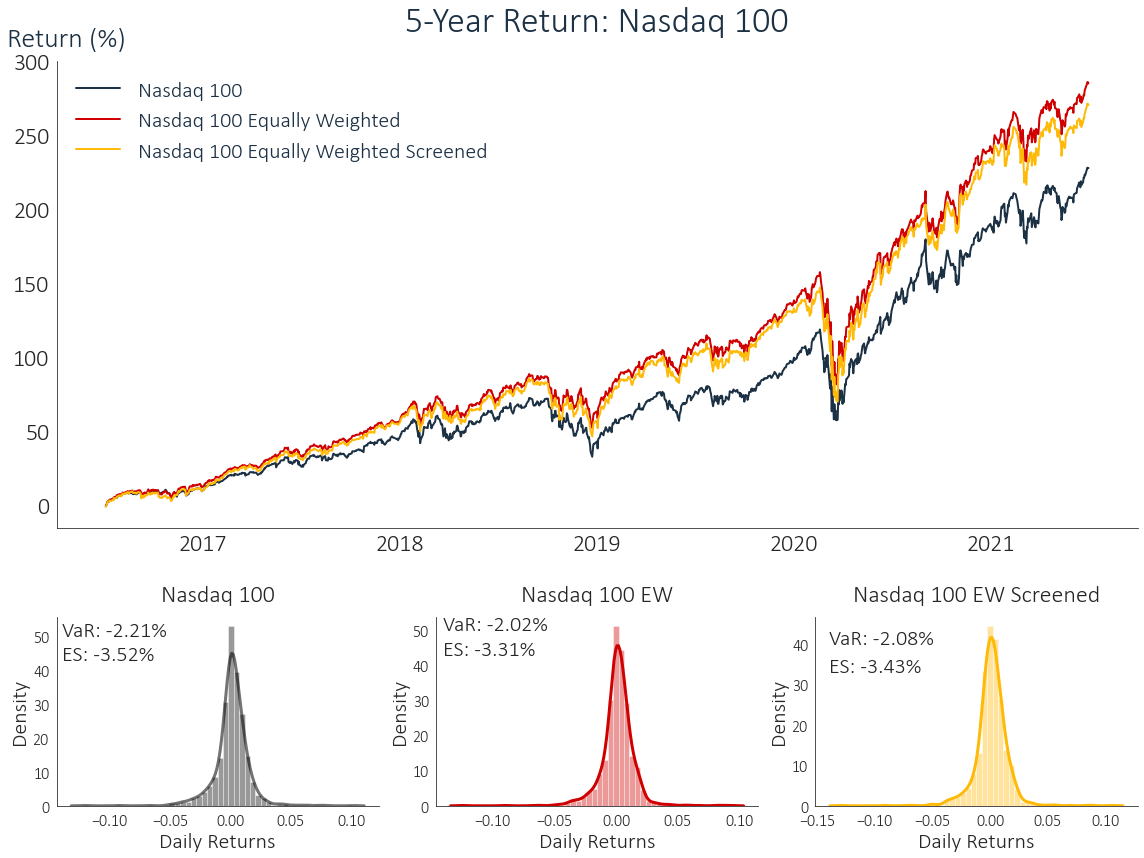

In [26]:
fig = plt.figure(figsize=(16,12))
ax1 = plt.subplot2grid((6, 3), (0,0), rowspan=4, colspan=3)
ax1.spines["top"].set_visible(False)
ax1.spines["right"].set_visible(False)
plt.xticks(fontsize=24, fontname='Calibri', weight='light', color=(0,0,0,0.85))
plt.yticks(fontsize=24, fontname='Calibri', weight='light', color=(0,0,0,0.85))
ax2 = plt.subplot2grid((6, 3), (4,0), rowspan=2, colspan=1)
ax2.spines["top"].set_visible(False)
ax2.spines["right"].set_visible(False)
plt.xticks(fontsize=16, fontname='Calibri', weight='light', color=(0,0,0,0.85))
plt.yticks(fontsize=16, fontname='Calibri', weight='light', color=(0,0,0,0.85))
ax2.set_title("Nasdaq 100", fontsize=24, fontname='Calibri', weight='light', color=(0,0,0,0.85), y=1.05)
ax3 = plt.subplot2grid((6, 3), (4,1), rowspan=2, colspan=1)
ax3.spines["top"].set_visible(False)
ax3.spines["right"].set_visible(False)
plt.xticks(fontsize=16, fontname='Calibri', weight='light', color=(0,0,0,0.85))
plt.yticks(fontsize=16, fontname='Calibri', weight='light', color=(0,0,0,0.85))
ax3.set_title("Nasdaq 100 EW", fontsize=24, fontname='Calibri', weight='light', color=(0,0,0,0.85), y=1.05)
ax4 = plt.subplot2grid((6, 3), (4,2), rowspan=2, colspan=1)
ax4.spines["top"].set_visible(False)
ax4.spines["right"].set_visible(False)
plt.xticks(fontsize=16, fontname='Calibri', weight='light', color=(0,0,0,0.85))
plt.yticks(fontsize=16, fontname='Calibri', weight='light', color=(0,0,0,0.85))
ax4.set_title("Nasdaq 100 EW Screened", fontsize=24, fontname='Calibri', weight='light', color=(0,0,0,0.85), y=1.05)

ax1.set_ylabel('Return (%)', fontsize=28, fontname='Calibri', fontweight='light', labelpad=6, color='#1C3144', rotation='horizontal', horizontalalignment='left', y=1.02)

ax1.set_title(label='5-Year Return: Nasdaq 100', fontsize=36, color='#1C3144', fontname='Calibri', weight='ultralight', y=1.05)
ax1.plot(cumu_nasdaq, color='#1C3144', lw=2, label='Nasdaq 100')
ax1.plot(cumu_balanced, color='#D00000', lw=2, label='Nasdaq 100 Equally Weighted')
ax1.plot(cumu_screened, color='#FFBA08', lw=2, label='Nasdaq 100 Equally Weighted Screened')
L = ax1.legend(frameon=False, loc='upper left', fontsize=22)
plt.setp(L.texts, family='Calibri', weight='light', color='#1C3144')

sns.distplot(nasdaq_portfolio, color=(0,0,0,0.55), bins=50, ax=ax2, kde_kws=dict(linewidth=3))
sns.distplot(balanced_portfolio, color='#D00000', bins=50, ax=ax3, kde_kws=dict(linewidth=3))
sns.distplot(screened_portfolio, color='#FFBA08', bins=50, ax=ax4, kde_kws=dict(linewidth=3))

ax2.set_xlabel("Daily Returns", fontsize=22, fontname='Calibri', weight='light', color=(0,0,0,0.85))
ax2.text(x=-0.14, y=50, s='VaR: -2.21%', fontdict={'fontname':'calibri', 'weight':'light', 'size':22, 'color':(0,0,0,0.85)})
ax2.text(x=-0.14, y=43, s='ES: -3.52%', fontdict={'fontname':'calibri', 'weight':'light', 'size':22, 'color':(0,0,0,0.85)})

ax3.set_xlabel("Daily Returns", fontsize=22, fontname='Calibri', weight='light', color=(0,0,0,0.85))
ax3.text(x=-0.14, y=50, s='VaR: -2.02%', fontdict={'fontname':'calibri', 'weight':'light', 'size':22, 'color':(0,0,0,0.85)})
ax3.text(x=-0.14, y=43, s='ES: -3.31%', fontdict={'fontname':'calibri', 'weight':'light', 'size':22, 'color':(0,0,0,0.85)})

ax4.set_xlabel("Daily Returns", fontsize=22, fontname='Calibri', weight='light', color=(0,0,0,0.85))
ax4.text(x=-0.14, y=40, s='VaR: -2.08%', fontdict={'fontname':'calibri', 'weight':'light', 'size':22, 'color':(0,0,0,0.85)})
ax4.text(x=-0.14, y=33, s='ES: -3.43%', fontdict={'fontname':'calibri', 'weight':'light', 'size':22, 'color':(0,0,0,0.85)})

ax2.set_ylabel("Density", fontsize=22, fontname='Calibri', weight='light', color=(0,0,0,0.85))
ax3.set_ylabel("Density", fontsize=22, fontname='Calibri', weight='light', color=(0,0,0,0.85))
ax4.set_ylabel("Density", fontsize=22, fontname='Calibri', weight='light', color=(0,0,0,0.85))


plt.tight_layout(h_pad=3)

plt.savefig('NASDAQ_Graph.jpeg', format='jpeg', dpi=300)


In [27]:
expected_shortfall(screened_portfolio)

VaR: Nasdaq 100 Screened   -0.020762
Name: 0.05, dtype: float64


-0.03425589779785385

In [28]:
""" MENTION BIG TECH FAILING SCREENS SO FANG STOCKS SKEW THIS - SCREENING DOES HOWEVER LOWER VAR AND ES BY 0.13% AND 0.09% 
    RESPECTIVELY OVER MARKET CAP WEIGHTED NASDAQ 100 
"""

' MENTION BIG TECH FAILING SCREENS SO FANG STOCKS SKEW THIS - SCREENING DOES HOWEVER LOWER VAR AND ES BY 0.13% AND 0.09% \n    RESPECTIVELY OVER MARKET CAP WEIGHTED NASDAQ 100 \n'

In [29]:
def sharpe_ratio(return_series, N, rf):
    mean = return_series.mean() * N -rf
    sigma = return_series.std() * np.sqrt(N)
    print(sigma * sigma)
    return mean / sigma

N = 255 #255 trading days in a year
rf =0.01 #1% risk free rate

In [30]:
def sortino_ratio(series, N,rf):
    mean = series.mean() * N -rf
    std_neg = series[series<0].std()*np.sqrt(N)
    return mean/std_neg

In [31]:
def max_drawdown(return_series):
    comp_ret = (return_series+1).cumprod()
    peak = comp_ret.expanding(min_periods=1).max()
    dd = (comp_ret/peak)-1
    return dd.min()

In [32]:
returns_frame = pd.concat([nasdaq_portfolio, balanced_portfolio, screened_portfolio], axis=1)

In [34]:
returns_frame.to_csv("nasdaq_returns_dataframe.csv")

In [35]:
sharpes = []
for col in returns_frame:
    sharpe = sharpe_ratio(returns_frame[col], N, rf)
    sharpes.append(sharpe)

0.05052981769341644
0.04611614130950073
0.04991712745901204


In [36]:
sortinos = []
for col in returns_frame:
    sortino = sortino_ratio(returns_frame[col], N, rf)
    sortinos.append(sortino)

In [37]:
dds = []
for col in returns_frame:
    dd = max_drawdown(returns_frame[col])
    dds.append(dd)

In [38]:
returns_frame.columns

Index(['Nasdaq 100', 'Nasdaq 100 Balanced', 'Nasdaq 100 Screened'], dtype='object')

In [39]:
calmars = [0, 0, 0]
calmars[0] = returns_frame['Nasdaq 100'].mean()*255/abs(-0.33924960006097205)
calmars[1] = returns_frame['Nasdaq 100 Balanced'].mean()*255/abs(-0.3900637330909167)
calmars[2] = returns_frame['Nasdaq 100 Screened'].mean()*255/abs(-0.3864815399423005)
calmars

[0.7851020730313226, 0.7613600818311187, 0.7523900459884593]

In [40]:
var = [0, 0, 0]
var[0] = value_at_risk(nasdaq_portfolio)
var[1] = value_at_risk(balanced_portfolio)
var[2] = value_at_risk(screened_portfolio)
var

VaR: Nasdaq 100   -0.02209
Name: 0.05, dtype: float64
VaR: Nasdaq 100 Balanced   -0.020232
Name: 0.05, dtype: float64
VaR: Nasdaq 100 Screened   -0.020762
Name: 0.05, dtype: float64


[-0.022089944756367386, -0.020232258212317895, -0.02076247964587516]

In [41]:
es = [0, 0, 0]
es[0] = expected_shortfall(nasdaq_portfolio)
es[1] = expected_shortfall(balanced_portfolio)
es[2] = expected_shortfall(screened_portfolio)
es

VaR: Nasdaq 100   -0.02209
Name: 0.05, dtype: float64
VaR: Nasdaq 100 Balanced   -0.020232
Name: 0.05, dtype: float64
VaR: Nasdaq 100 Screened   -0.020762
Name: 0.05, dtype: float64


[-0.03517606879155579, -0.033128934101777543, -0.03425589779785385]

In [42]:
btstats = pd.DataFrame()
btstats['Sortino'] = sortinos
btstats['Sharpe'] = sharpes
btstats['Calmar'] = calmars
btstats['Max DD'] = dds
btstats['VaR'] = var
btstats['ES'] = es

btstats['temp'] = ['Nasdaq 100', 'Nasdaq EW', 'Nasdaq EW Screened']
btstats.set_index('temp', inplace=True)

In [43]:
btstats

,Sortino,Sharpe,Calmar,Max DD,VaR,ES
temp,,,,,,
Nasdaq 100,1.323957,1.140386,0.785102,-0.280329,-0.022090,-0.035176
Nasdaq EW,1.542641,1.336360,0.761360,-0.294453,-0.020232,-0.033129
Nasdaq EW Screened,1.490559,1.256750,0.752390,-0.311261,-0.020762,-0.034256


In [44]:
cumu_nasdaq.tail()

,Nasdaq 100
Date,
2021-06-25,223.275283
2021-06-28,227.327177
2021-06-29,228.403686
2021-06-30,227.999170
2021-07-01,228.117481


In [45]:
cumu_balanced.tail()

,Nasdaq 100 Balanced
Date,
2021-06-25,281.641597
2021-06-28,284.821925
2021-06-29,286.285839
2021-06-30,286.217262
2021-07-01,285.346793


In [46]:
cumu_screened.tail()

,Nasdaq 100 Screened
Date,
2021-06-25,266.131086
2021-06-28,269.997311
2021-06-29,271.671994
2021-06-30,271.555734
2021-07-01,270.666793


In [47]:
from scipy import stats
# Y and Z are numpy arrays or lists of variables 
stats.pearsonr(cumu_balanced['Nasdaq 100 Balanced'], cumu_screened['Nasdaq 100 Screened'].iloc[1:])

(0.9996666825152822, 0.0)

In [48]:
import pyfolio as pf

C:\Users\44738\anaconda3\lib\site-packages\pyfolio\pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


Start date,2016-07-05
End date,2021-07-01
Total months,59
,Backtest
Annual return,30.0%
Cumulative returns,270.7%
Annual volatility,22.2%
Sharpe ratio,1.29
Calmar ratio,0.96
Stability,0.96
Max drawdown,-31.1%


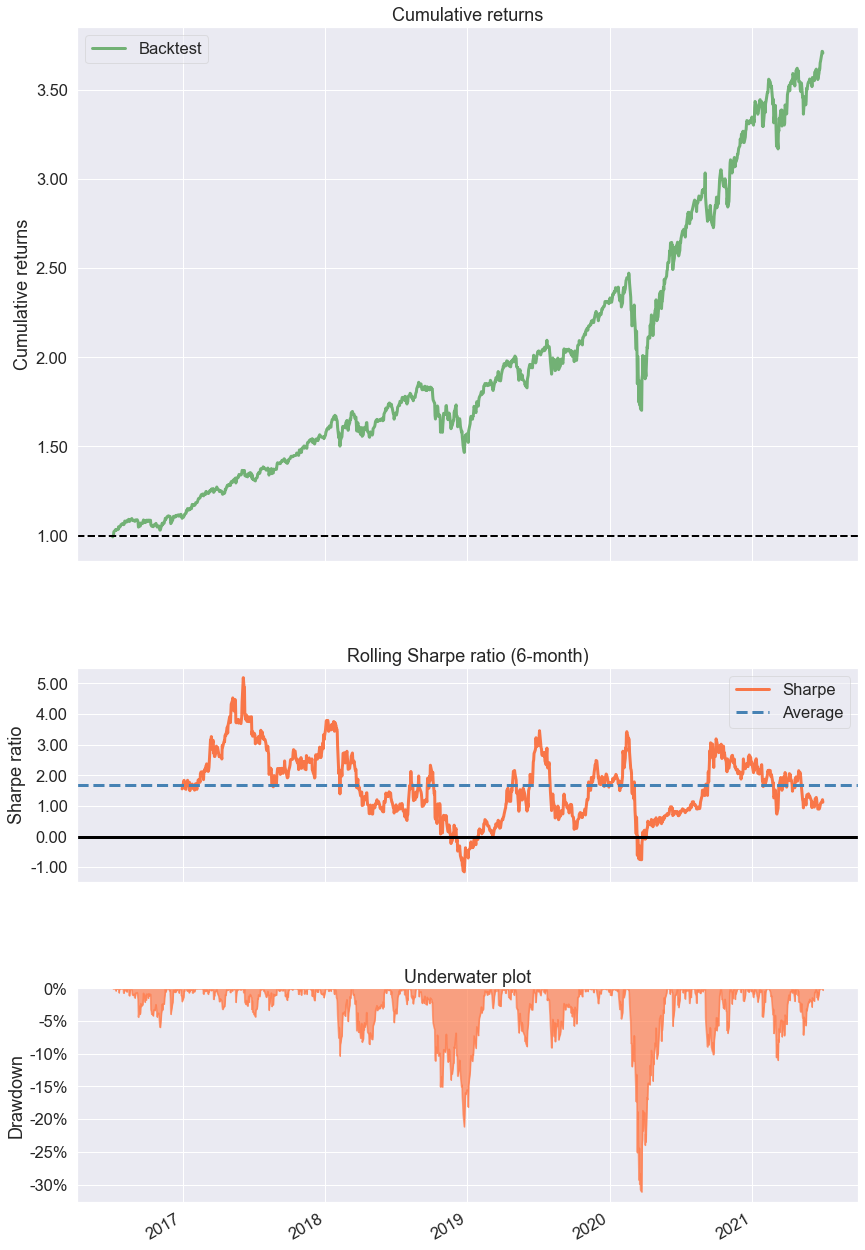

In [52]:
pf.create_simple_tear_sheet(returns_frame['Nasdaq 100 Screened'])

In [ ]:
returns_csv['Date'] = pd.to_datetime(returns_csv['Date'])
returns_csv.set_index('Date', inplace=True)